In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')


In [100]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data",names=['White King col','White King row','White Rook col','White Rook row','Black King col','Black King row','Result/Mate'])
data.head()

,White King col,White King row,White Rook col,White Rook row,Black King col,Black King row,Result/Mate
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [101]:
data.shape

(28056, 7)

In [102]:
data.isnull().sum()

White King col    0
White King row    0
White Rook col    0
White Rook row    0
Black King col    0
Black King row    0
Result/Mate       0
dtype: int64

In [103]:
data['Result/Mate'].unique()

array(['draw', 'zero', 'one', 'two', 'three', 'four', 'five', 'six',
       'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen',
       'fourteen', 'fifteen', 'sixteen'], dtype=object)

In [104]:

data['Result/Mate'] = ["Draw" if x=="draw"
                 else "Hard" if x in [ 'thirteen',
       'fourteen', 'fifteen', 'sixteen'] else "Easy" for x in data['Result/Mate']]
data


,White King col,White King row,White Rook col,White Rook row,Black King col,Black King row,Result/Mate
0,a,1,b,3,c,2,Draw
1,a,1,c,1,c,2,Draw
2,a,1,c,1,d,1,Draw
3,a,1,c,1,d,2,Draw
4,a,1,c,2,c,1,Draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,Hard
28052,b,1,g,7,e,6,Hard
28053,b,1,g,7,e,7,Hard
28054,b,1,g,7,f,5,Hard


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   White King col  28056 non-null  object
 1   White King row  28056 non-null  int64 
 2   White Rook col  28056 non-null  object
 3   White Rook row  28056 non-null  int64 
 4   Black King col  28056 non-null  object
 5   Black King row  28056 non-null  int64 
 6   Result/Mate     28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [106]:
for i in range(len(data)):
    data['White King col'][i] = ord(data['White King col'][i]) - 96
    data['White Rook col'][i] = ord(data['White Rook col'][i]) - 96
    data['Black King col'][i] = ord(data['Black King col'][i]) - 96

In [107]:
data.head()

,White King col,White King row,White Rook col,White Rook row,Black King col,Black King row,Result/Mate
0,1,1,2,3,3,2,Draw
1,1,1,3,1,3,2,Draw
2,1,1,3,1,4,1,Draw
3,1,1,3,1,4,2,Draw
4,1,1,3,2,3,1,Draw


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   White King col  28056 non-null  object
 1   White King row  28056 non-null  int64 
 2   White Rook col  28056 non-null  object
 3   White Rook row  28056 non-null  int64 
 4   Black King col  28056 non-null  object
 5   Black King row  28056 non-null  int64 
 6   Result/Mate     28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


<AxesSubplot:xlabel='Result/Mate', ylabel='count'>

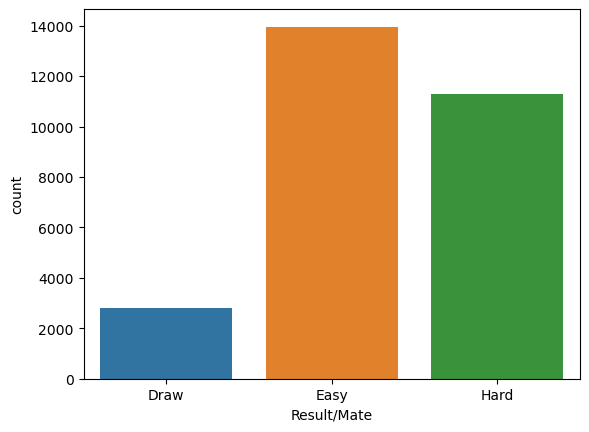

In [110]:
sns.countplot(x = 'Result/Mate', data=data)

In [111]:
X = data.iloc[:,0:-1]
y = data['Result/Mate']

In [112]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-2.25115806, -0.92185718, -1.10778429, -0.6625555 , -0.87712857,
        -1.09049491],
       [-2.25115806, -0.92185718, -0.67263649, -1.53871769, -0.87712857,
        -1.09049491],
       [-2.25115806, -0.92185718, -0.67263649, -1.53871769, -0.44427275,
        -1.53526617],
       ...,
       [-1.18385898, -0.92185718,  1.06795468,  1.08976889, -0.01141693,
         1.13336137],
       [-1.18385898, -0.92185718,  1.06795468,  1.08976889,  0.42143889,
         0.24381886],
       [-1.18385898, -0.92185718,  1.06795468,  1.08976889,  0.85429472,
         0.24381886]])

In [113]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [114]:
samples

[(      White King col  White King row White Rook col  White Rook row  \
  18636              3               2              2               7   
  229                2               1              2               3   
  14180              3               2              1               1   
  5961               4               3              1               6   
  24491              4               1              3               1   
  ...              ...             ...            ...             ...   
  13123              4               4              8               2   
  19648              4               1              4               6   
  9845               4               3              5               3   
  10799              2               2              7               4   
  2732               4               4              7               3   
  
        Black King col  Black King row  
  18636              7               7  
  229                3               3 

In [115]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [116]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [117]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.66 Best Kernel =  rbf Best Nu =  2.87 Best Epsilon =  7.35
Best Accuracy =  0.79 Best Kernel =  rbf Best Nu =  7.2 Best Epsilon =  5.14
Best Accuracy =  0.67 Best Kernel =  rbf Best Nu =  8.93 Best Epsilon =  9.63
Best Accuracy =  0.67 Best Kernel =  rbf Best Nu =  0.71 Best Epsilon =  5.56
Best Accuracy =  0.71 Best Kernel =  rbf Best Nu =  6.87 Best Epsilon =  4.52
Best Accuracy =  0.73 Best Kernel =  rbf Best Nu =  3.01 Best Epsilon =  4.1
Best Accuracy =  0.89 Best Kernel =  rbf Best Nu =  9.89 Best Epsilon =  1.98
Best Accuracy =  0.8 Best Kernel =  rbf Best Nu =  3.09 Best Epsilon =  2.01
Best Accuracy =  0.8 Best Kernel =  rbf Best Nu =  6.29 Best Epsilon =  4.73
Best Accuracy =  0.71 Best Kernel =  rbf Best Nu =  7.05 Best Epsilon =  4.74


In [118]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.66,rbf,2.87,7.35
1,2,0.79,rbf,7.20,5.14
2,3,0.67,rbf,8.93,9.63
3,4,0.67,rbf,0.71,5.56
4,5,0.71,rbf,6.87,4.52
5,6,0.73,rbf,3.01,4.10
6,7,0.89,rbf,9.89,1.98
7,8,0.80,rbf,3.09,2.01
8,9,0.80,rbf,6.29,4.73
9,10,0.71,rbf,7.05,4.74


In [119]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [120]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [121]:
train_sizes

array([  176,   533,   890,  1248,  1605,  1962,  2319,  2676,  3033,
        3390,  3747,  4104,  4462,  4819,  5176,  5533,  5890,  6247,
        6604,  6961,  7318,  7676,  8033,  8390,  8747,  9104,  9461,
        9818, 10175, 10532, 10889, 11247, 11604, 11961, 12318, 12675,
       13032, 13389, 13746, 14103, 14461, 14818, 15175, 15532, 15889,
       16246, 16603, 16960, 17317, 17675])

In [122]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

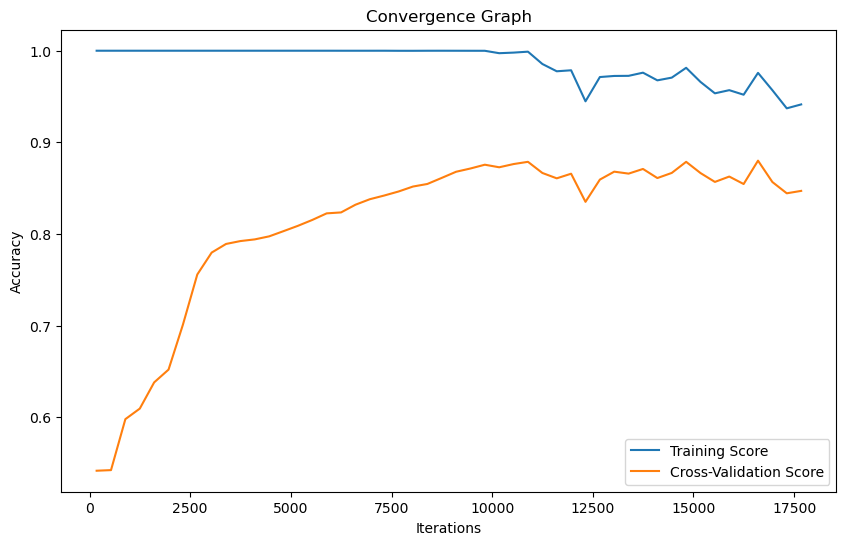

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()